In [156]:
import pandas as pd													# data manipulation
import matplotlib.pyplot as plt												# graphs
import seaborn as sns													# graphs
import numpy as np													# graphs
from scipy.stats import norm												# statistics
from sklearn.preprocessing import StandardScaler									# statistics
from scipy import stats													# statistics
from math import *													# advance calculation	
from matplotlib import cm												# graphs
import sys														# system functions
import warnings														# indicating warnings
warnings.filterwarnings('ignore')											# ignore by default
from matplotlib.ticker import LinearLocator										# graphs
pd.set_option('display.max_columns', None)										# show all columns
pd.set_option('display.max_rows', None)											# show all rows
np.set_printoptions(threshold=sys.maxsize)										# show arrays full
pd.set_option("display.max_colwidth", -1)										# show a complete text in a cell
from xlsxwriter.workbook import Workbook										# CSV writing
import csv														# CSV writing	
import xgboost as xgb													# prediction
import pickle														# prediction	
import sklearn														# mutual information
import statsmodels.api as sm												# coefficient
from sklearn.ensemble import RandomForestClassifier									# random forest
from sklearn import linear_model											# linear regression
import pymysql														# MySql connection

In [180]:
df = pd.read_csv('df.csv')

In [181]:
# Adding leading zero 
df['show_id'] = df['show_id'].apply(lambda x: '{0:0>8}'.format(x))

In [182]:
# Filling some empty values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['country'] = df['country'].fillna('*Unknown')

In [183]:
# Getting rid of different comma pattern so that we can easily separate and count them
df.replace({'country': {' ,': ',',', ': ','}}, inplace=True, regex=True)
df.replace({'director': {' ,': ',',', ': ','}}, inplace=True, regex=True)
df.replace({'cast': {' ,': ',',', ': ','}}, inplace=True, regex=True)
df.replace({'listed_in': {' ,': ',',', ': ','}}, inplace=True, regex=True)

# Removing extra spaces, though is not that much necessary
df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()
df['country'] = df['country'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['date_added'] = df['date_added'].str.strip()

In [6]:
# split a char and count values (director)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(df['director'])
df2 = df2.sum().sort_values(ascending=False)
dfdirector = df2.copy()
dfdirector

Unknown                             1969
Jan Suter                           21  
Raúl Campos                         19  
Jay Karas                           14  
Marcus Raboy                        14  
Jay Chapman                         12  
Martin Scorsese                     9   
Steven Spielberg                    9   
Shannon Hartman                     8   
David Dhawan                        8   
Umesh Mehra                         8   
Lance Bangs                         8   
Johnnie To                          8   
S.S. Rajamouli                      7   
Dibakar Banerjee                    7   
Hakan Algül                         7   
Noah Baumbach                       7   
Robert Rodriguez                    7   
Cathy Garcia-Molina                 7   
Yılmaz Erdoğan                      7   
Ryan Polito                         7   
Quentin Tarantino                   7   
Zoya Akhtar                         6   
Riri Riza                           6   
Fernando Ayllón 

In [8]:
# split a char and count values (cast)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(df['cast'])
df2 = df2.sum().sort_values(ascending=False)
dfcast = df2.copy()
dfcast

Unknown                                                                                 570
Anupam Kher                                                                             33 
Shah Rukh Khan                                                                          30 
Naseeruddin Shah                                                                        27 
Om Puri                                                                                 27 
Akshay Kumar                                                                            26 
Yuki Kaji                                                                               26 
Paresh Rawal                                                                            25 
Takahiro Sakurai                                                                        25 
Amitabh Bachchan                                                                        24 
Boman Irani                                                                     

In [28]:
# split a char and count values (country)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(df['country'])
df2 = df2.sum().sort_values(ascending=False)
df2 = df2.drop([''])
dfcountry = df2.copy()
dfcountry

United States           2610
India                   838 
United Kingdom          602 
Unknown                 476 
Canada                  318 
France                  271 
Japan                   231 
Spain                   178 
South Korea             162 
Germany                 151 
Mexico                  129 
Australia               126 
China                   120 
Hong Kong               97  
Turkey                  87  
Taiwan                  75  
Argentina               68  
Italy                   67  
Brazil                  66  
Belgium                 66  
Thailand                56  
Egypt                   54  
Indonesia               52  
Philippines             47  
Denmark                 38  
Netherlands             37  
Nigeria                 36  
Colombia                36  
Sweden                  33  
Ireland                 33  
Singapore               30  
South Africa            30  
Poland                  27  
Israel                  26  
New Zealand   

In [20]:
# split a char and count values (listed_in)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(df['listed_in'])
df2 = df2.sum().sort_values(ascending=False)
dflisted_in = df2.copy()
dflisted_in

International Movies            1927
Dramas                          1623
Comedies                        1113
International TV Shows          1001
Documentaries                   668 
TV Dramas                       599 
Action & Adventure              597 
Independent Movies              552 
TV Comedies                     436 
Thrillers                       392 
Children & Family Movies        378 
Romantic Movies                 376 
Crime TV Shows                  363 
Kids' TV                        328 
Stand-Up Comedy                 281 
Docuseries                      279 
Romantic TV Shows               278 
Horror Movies                   262 
Music & Musicals                243 
British TV Shows                210 
Sci-Fi & Fantasy                193 
Sports Movies                   157 
Reality TV                      153 
Korean TV Shows                 132 
TV Action & Adventure           126 
Anime Series                    117 
Spanish-Language TV Shows       117 
C

In [31]:
dfword_evil = df[df['description'].str.contains('evil')]

In [32]:
# split a char and count values (content searching: evil)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_evil['country'])
df2 = df2.sum().sort_values(ascending=False)
dfword_evil_show = df2.copy()
dfword_evil_show

United States     59
Japan             19
Canada            14
India             10
United Kingdom    10
France            9 
South Korea       5 
Unknown           5 
China             4 
Germany           3 
New Zealand       3 
Hong Kong         3 
Italy             3 
Bulgaria          2 
Indonesia         2 
Jordan            2 
Netherlands       2 
Peru              1 
Switzerland       1 
Brazil            1 
Ireland           1 
Albania           1 
Poland            1 
Turkey            1 
Qatar             1 
Iran              1 
Spain             1 
Mexico            1 
Czech Republic    1 
Kazakhstan        1 
Chile             1 
Colombia          1 
Singapore         1 
Australia         1 
Lebanon           1 
dtype: int64

In [50]:
dfword_love = df[df['description'].str.contains('love')]

In [51]:
# split a char and count values (content searching: love)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_love['country'])
df2 = df2.sum().sort_values(ascending=False)
dfword_love_show = df2.copy()
dfword_love_show

India             113
United States     110
Unknown           42 
United Kingdom    25 
Taiwan            21 
France            18 
South Korea       16 
Spain             15 
Canada            14 
Mexico            12 
Germany           12 
Japan             12 
China             11 
Hong Kong         11 
Turkey            11 
Indonesia         9  
Australia         8  
Philippines       7  
Brazil            6  
Colombia          6  
Belgium           6  
Thailand          4  
Nigeria           4  
Pakistan          4  
Argentina         4  
Denmark           3  
Singapore         3  
Egypt             3  
Israel            3  
Italy             3  
Sweden            2  
Switzerland       2  
Norway            2  
New Zealand       1  
Netherlands       1  
Azerbaijan        1  
Peru              1  
Latvia            1  
Finland           1  
Lebanon           1  
Austria           1  
Soviet Union      1  
South Africa      1  
Iceland           1  
Poland            1  
Malta     

In [58]:
def search(df, *words):  
    return df[np.logical_and.reduce([df['description'].str.contains(word) for word in words])]
dfword_lovesex = search(df, 'love', 'sex')

In [59]:
# split a char and count values (content searching: love and sex together)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_lovesex['country'])
df2 = df2.sum().sort_values(ascending=False)
dfword_lovesex_show = df2.copy()
dfword_lovesex_show

United States    5
India            4
Unknown          1
Brazil           1
Poland           1
South Korea      1
dtype: int64

In [60]:
def search(df, *words):  
    return df[np.logical_and.reduce([df['description'].str.contains(word) for word in words])]
dfword_wardead = search(df, 'war', 'dead')

In [61]:
# split a char and count values (content searching: war and dead together)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_wardead['country'])
df2 = df2.sum().sort_values(ascending=False)
dfword_wardead_show = df2.copy()
dfword_wardead_show

India             2
United States     2
Hong Kong         1
Philippines       1
Belgium           1
Spain             1
United Kingdom    1
dtype: int64

In [64]:
dfword_technology = df[df['description'].str.contains('technology')]

In [65]:
# split a char and count values (content searching: technology)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_technology['country'])
df2 = df2.sum().sort_values(ascending=False)
dfword_technology_show = df2.copy()
dfword_technology_show

United States     8
Canada            3
Unknown           2
Japan             2
United Kingdom    1
Poland            1
Philippines       1
Argentina         1
Mexico            1
Germany           1
France            1
Brazil            1
dtype: int64

In [67]:
dfword_sport = df[df['description'].str.contains('sport')]

In [68]:
# split a char and count values (content searching: sport)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_sport['country'])
df2 = df2.sum().sort_values(ascending=False)
dfword_sport_show = df2.copy()
dfword_sport_show

United States     34
United Kingdom    5 
China             5 
France            4 
India             4 
Unknown           4 
Canada            4 
South Korea       2 
New Zealand       2 
Brazil            2 
Japan             2 
Germany           1 
Qatar             1 
Lebanon           1 
Bulgaria          1 
Egypt             1 
Thailand          1 
Australia         1 
Taiwan            1 
Italy             1 
Hong Kong         1 
Indonesia         1 
dtype: int64

In [69]:
dfword_poor = df[df['description'].str.contains('poor')]

In [70]:
# split a char and count values (content searching: poor)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_poor['country'])
df2 = df2.sum().sort_values(ascending=False)
dfword_poor_show = df2.copy()
dfword_poor_show

India             14
United Kingdom    4 
Germany           3 
South Korea       2 
Turkey            1 
Unknown           1 
Mexico            1 
Indonesia         1 
Brazil            1 
United States     1 
Bangladesh        1 
Taiwan            1 
dtype: int64

In [89]:
dfword_India = df.loc[df['country'] == 'India']

In [90]:
# split a char and count values (content searching: words from description feature associated with India)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(' '):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_India['description'])
df2 = df2.sum().sort_values(ascending=False)
dfword_India_show = df2.copy()
dfword_India_show
# Result: young, man, woman, family, love

a                            597
to                           470
the                          419
of                           370
and                          368
his                          302
in                           292
A                            193
for                          174
with                         169
an                           156
their                        131
her                          127
on                           116
young                        113
he                           109
is                           108
by                           98 
from                         97 
who                          96 
man                          92 
that                         91 
when                         81 
When                         78 
woman                        76 
this                         72 
but                          70 
as                           69 
into                         59 
After                        59 
at        

In [91]:
dfword_USA = df.loc[df['country'] == 'United States']

In [92]:
# split a char and count values (content searching: words from description feature associated with USA)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(' '):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_USA['description'])
df2 = df2.sum().sort_values(ascending=False)
dfword_USA_show = df2.copy()
dfword_USA_show
# Result: life, documentary, young, comedy, friends

a                              1261
the                            1237
and                            1213
to                             1033
of                             978 
in                             736 
his                            531 
with                           465 
on                             405 
an                             339 
for                            324 
her                            286 
this                           284 
their                          283 
A                              271 
from                           260 
as                             224 
is                             216 
by                             213 
that                           193 
who                            171 
he                             166 
When                           164 
into                           154 
at                             151 
In                             149 
This                           145 
–                           

In [93]:
dfword_UK = df.loc[df['country'] == 'United Kingdom']
# split a char and count values (content searching: words from description feature associated with UK)
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(' '):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfword_UK['description'])
df2 = df2.sum().sort_values(ascending=False)
dfword_UK_show = df2.copy()
dfword_UK_show
# Result: life, documentary, British, family, young

the                  231
and                  209
of                   184
a                    173
to                   162
in                   132
his                  90 
with                 62 
on                   58 
their                55 
an                   51 
for                  49 
A                    46 
this                 45 
as                   40 
This                 39 
is                   37 
from                 35 
her                  33 
by                   31 
In                   31 
at                   31 
that                 30 
who                  29 
into                 26 
series               26 
most                 24 
he                   23 
life                 22 
documentary          21 
about                19 
After                18 
British              18 
they                 17 
family               17 
when                 16 
When                 16 
up                   16 
–                    16 
young                15 


In [94]:
df.head(1)

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   

                  director  \
0  Richard Finn,Tim Maltby   

                                                                                                                                 cast  \
0  Alan Marriott,Andrew Toth,Brian Dobson,Cole Howard,Jennifer Cameron,Jonathan Holmes,Lee Tockar,Lisa Durupt,Maya Kay,Michael Dobson   

                                 country         date_added  release_year  \
0  United States,India,South Korea,China  September 9, 2019  2019           

  rating duration                          listed_in  \
0  TV-PG  90 min   Children & Family Movies,Comedies   

                                                                                                                                    description  
0  Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.

In [98]:
# features defined for plotting 
output = "release_year"
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

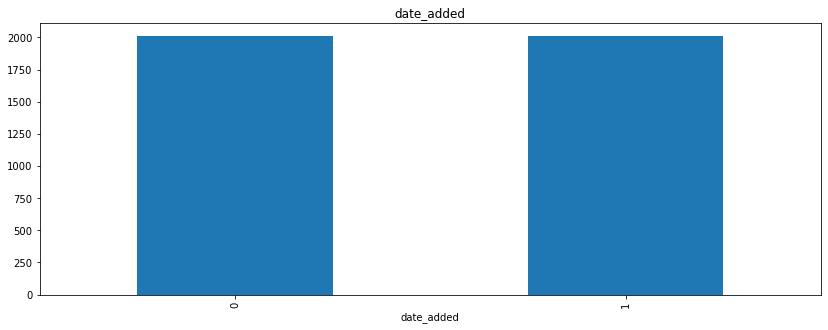

In [99]:
# NaN-containing feature
for feature in features_with_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 0, 1)
    data.groupby(feature)[output].mean().plot.bar(figsize=(14,5))
    plt.title(feature)
    plt.show()

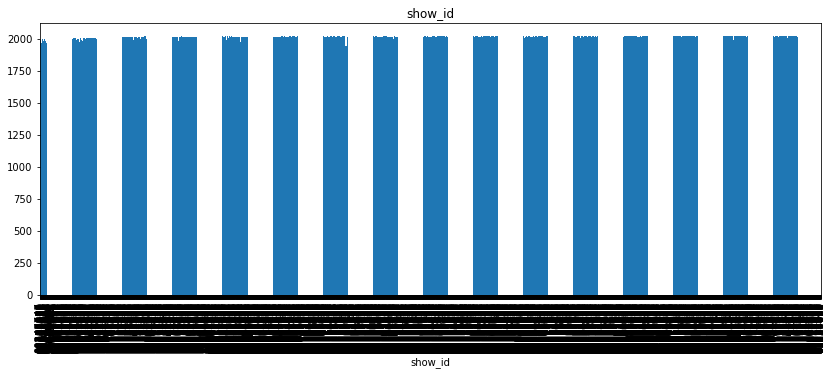

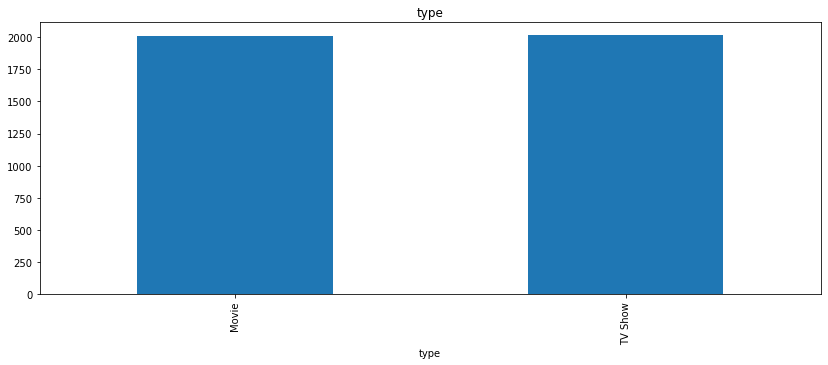

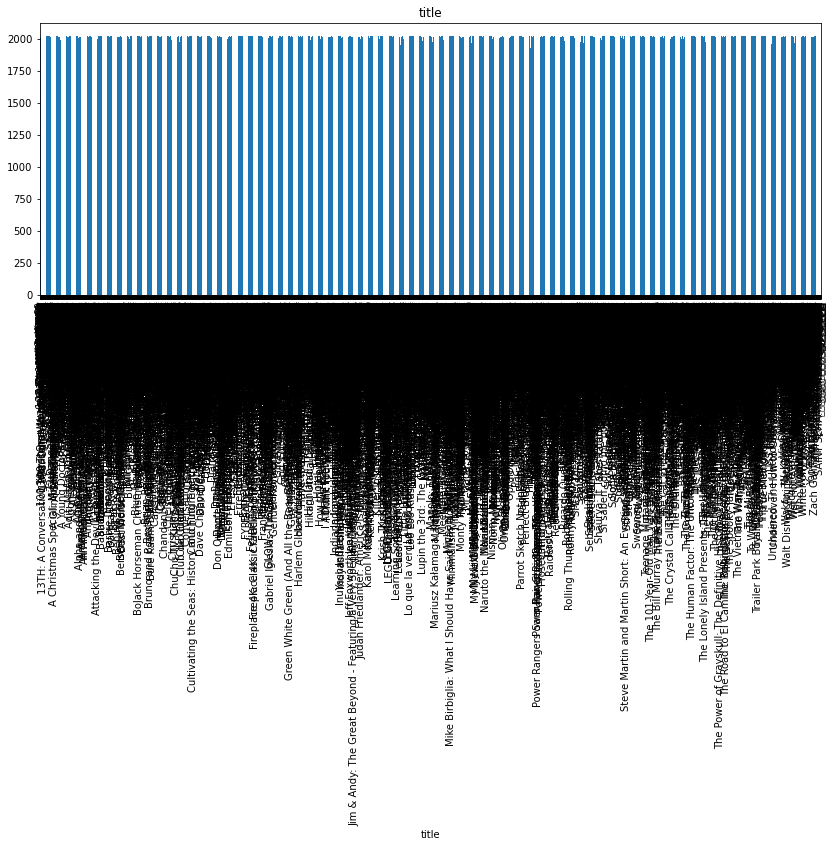

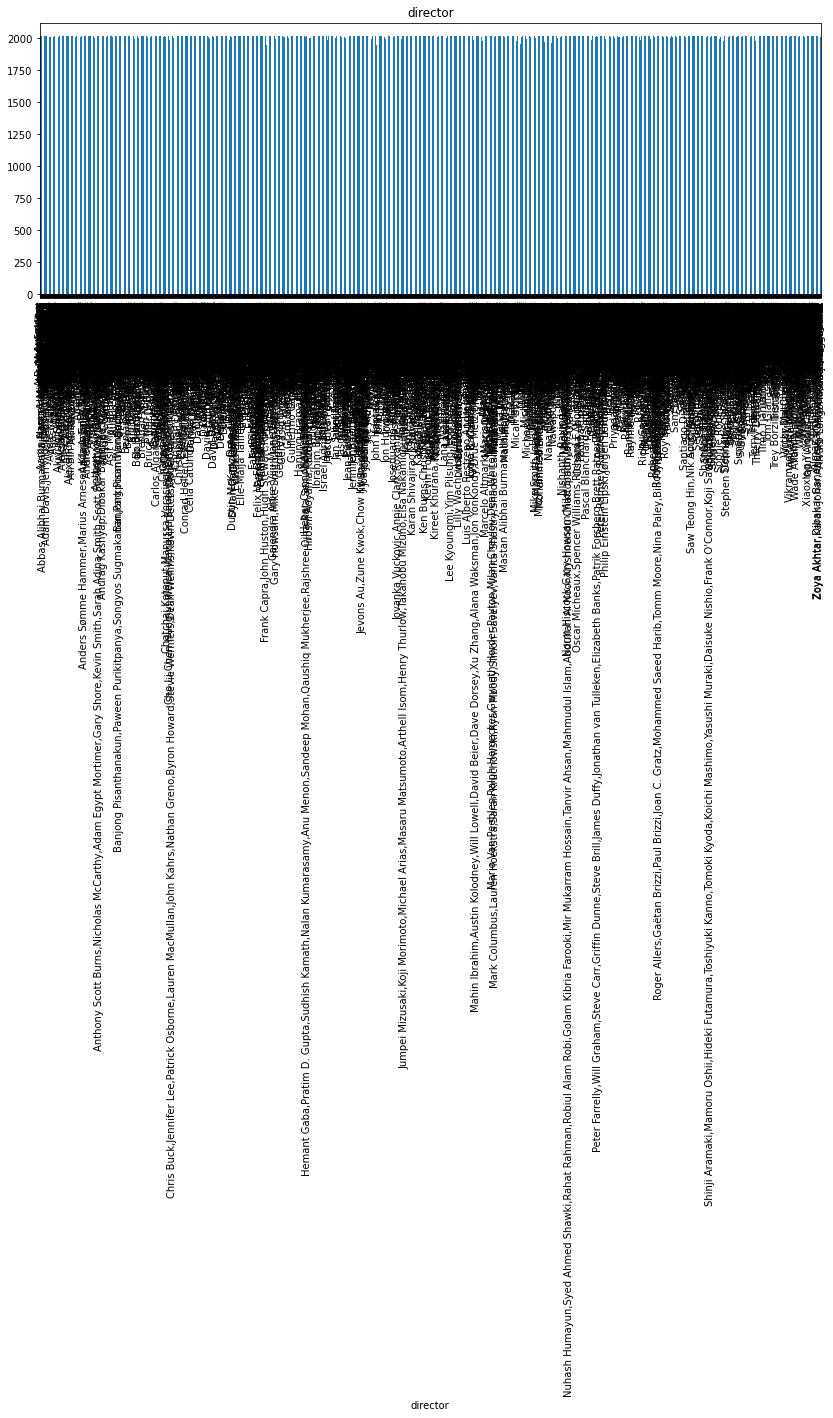

KeyboardInterrupt: 

In [101]:
# Categorical feature, grouped by
for feature in categorical_features:
    df.groupby(feature)[output].mean().plot(kind = 'bar', x=feature, y=output, figsize=(14,5));
    plt.title(feature)
    plt.show()

In [184]:
dftime = df['date_added'].str.split(', ', expand=True)
df = pd.concat([df, dftime], axis=1)
dftime2 = df[0].str.split(' ', expand=True)
df = pd.concat([df, dftime2], axis=1)
df.head(10)

show_id     type                                    title  \
0  81145628  Movie    Norm of the North: King Sized Adventure   
1  80117401  Movie    Jandino: Whatever it Takes                
2  70234439  TV Show  Transformers Prime                        
3  80058654  TV Show  Transformers: Robots in Disguise          
4  80125979  Movie    #realityhigh                              
5  80163890  TV Show  Apaches                                   
6  70304989  Movie    Automata                                  
7  80164077  Movie    Fabrizio Copano: Solo pienso en mi        
8  80117902  TV Show  Fire Chasers                              
9  70304990  Movie    Good People                               

                         director  \
0  Richard Finn,Tim Maltby          
1  Unknown                          
2  Unknown                          
3  Unknown                          
4  Fernando Lebrija                 
5  Unknown                          
6  Gabe Ibáñez                      
7  Rodrigo Toro,Francisco Schultz   
8  Unknown                          
9  Henrik Ruben Genz                

                                                                                                                                                                      cast  \
0  Alan Marriott,Andrew Toth,Brian Dobson,Cole Howard,Jennifer Cameron,Jonathan Holmes,Lee Tockar,Lisa Durupt,Maya Kay,Michael Dobson                                        
1  Jandino Asporaat                                                                                                                                                          
2  Peter Cullen,Sumalee Montano,Frank Welker,Jeffrey Combs,Kevin Michael Richardson,Tania Gunadi,Josh Keaton,Steve Blum,Andy Pessoa,Ernie Hudson,Daran Norris,Will Friedle   
3  Will Friedle,Darren Criss,Constance Zimmer,Khary Payton,Mitchell Whitfield,Stuart Allan,Ted McGinley,Peter Cullen                                                         
4  Nesta Cooper,Kate Walsh,John Michael Higgins,Keith Powers,Alicia Sanz,Jake Borelli,Kid Ink,Yousef Erakat,Rebekah Graf,Anne Winters,Peter Gilroy,Patrick Davis             
5  Alberto Ammann,Eloy Azorín,Verónica Echegui,Lucía Jiménez,Claudia Traisac                                                                                                 
6  Antonio Banderas,Dylan McDermott,Melanie Griffith,Birgitte Hjort Sørensen,Robert Forster,Christa Campbell,Tim McInnerny,Andy Nyman,David Ryall                            
7  Fabrizio Copano                                                                                                                                                           
8  Unknown                                                                                                                                                                   
9  James Franco,Kate Hudson,Tom Wilkinson,Omar Sy,Sam Spruell,Anna Friel,Thomas Arnold,Oliver Dimsdale,Diana Hardcastle,Michael Jibson,Diarmaid Murtagh                      

                                       country         date_added  \
0  United States,India,South Korea,China        September 9, 2019   
1  United Kingdom                               September 9, 2016   
2  United States                                September 8, 2018   
3  United States                                September 8, 2018   
4  United States                                September 8, 2017   
5  Spain                                        September 8, 2017   
6  Bulgaria,United States,Spain,Canada          September 8, 2017   
7  Chile                                        September 8, 2017   
8  United States                                September 8, 2017   
9  United States,United Kingdom,Denmark,Sweden  September 8, 2017   

   release_year    rating  duration  \
0  2019          TV-PG     90 min     
1  2016          TV-MA     94 min     
2  2013          TV-Y7-FV  1 Season   
3  2016          TV-Y7     1 Season   
4  2017   

In [186]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [194]:
df.to_csv(r'C:\Users\milad\Desktop\df.csv', index=None)

# Start

In [195]:
df = pd.read_csv('df.csv')

In [192]:
df['year_added'] = pd.DatetimeIndex(df.date_added).year
df['month_added'] = pd.DatetimeIndex(df.date_added).month										# convert datatype: datatime to month
df['day_added'] = pd.DatetimeIndex(df.date_added).day										# convert datatype: datatime to day


In [205]:
df['uptodate'] = df['year_added'] - df['release_year']

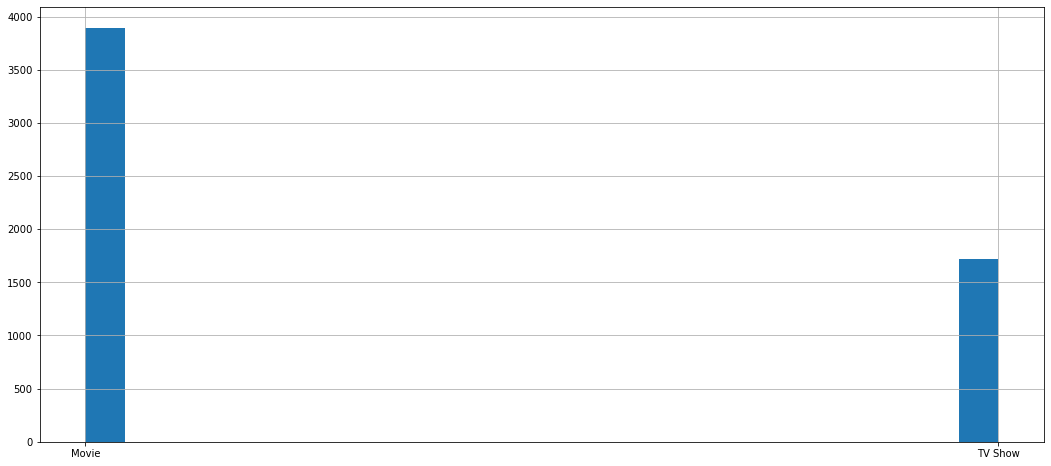

In [227]:
df.loc[df['year_added'] > 2016]['type'].hist(bins=23, figsize=(18,8));

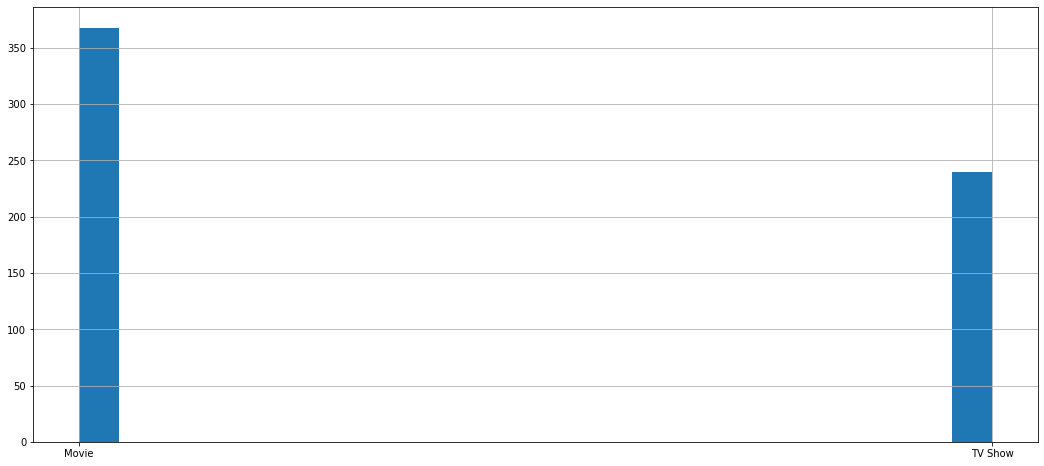

In [228]:
df.loc[df['year_added'] <= 2016]['type'].hist(bins=23, figsize=(18,8));

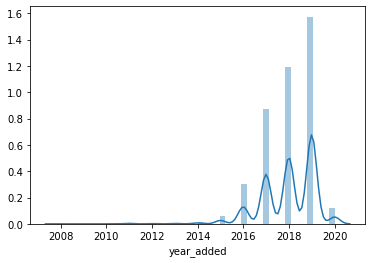

In [202]:
sns.distplot(df['year_added']);

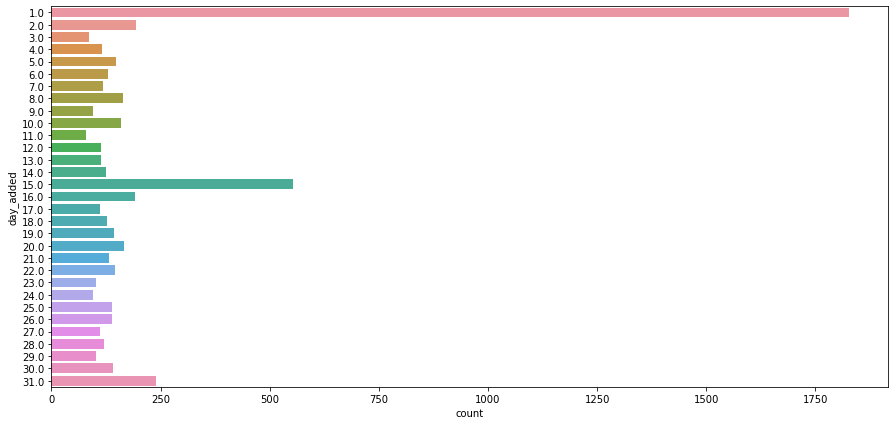

In [204]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(y=df['day_added']);

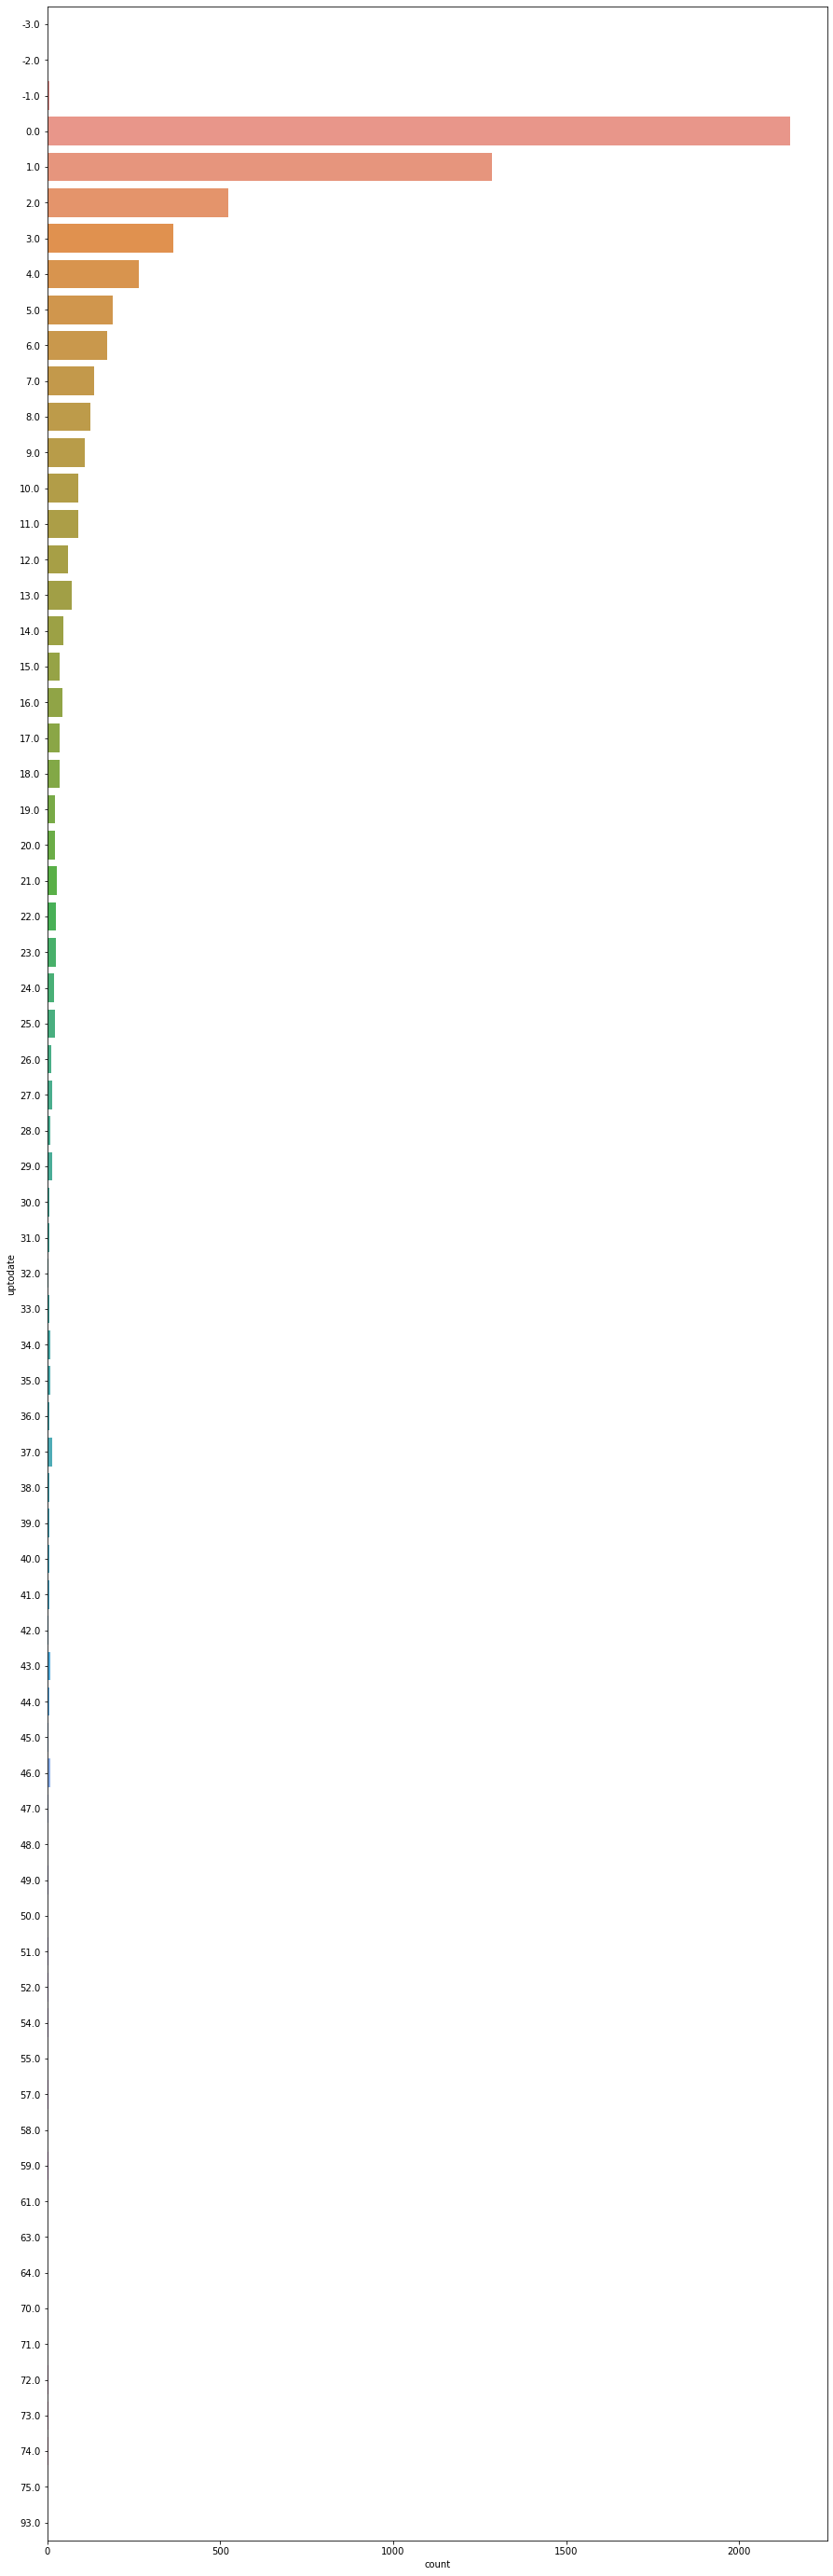

In [214]:
fig, ax = plt.subplots(figsize=(15, 50))
sns.countplot(y=df['uptodate']);

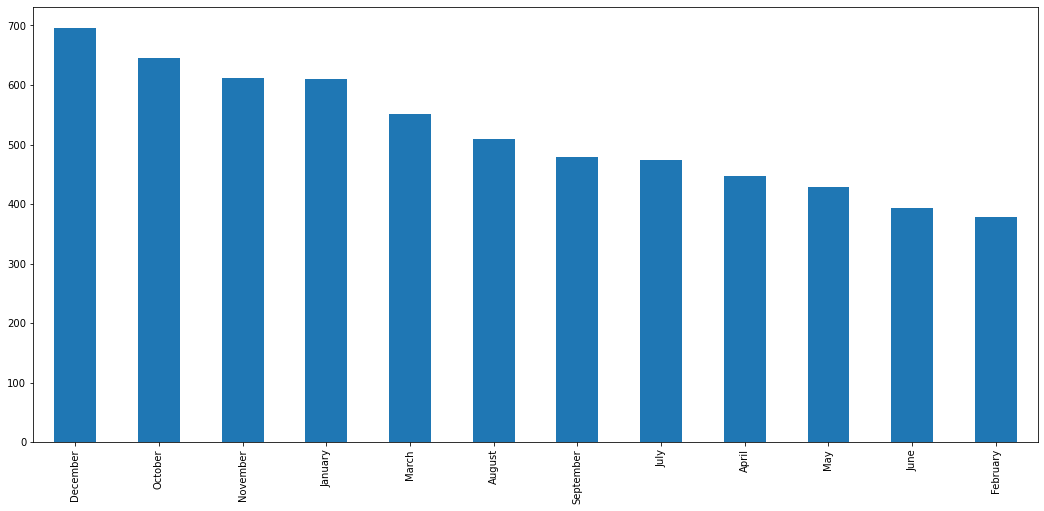

In [222]:
df['month_added'].value_counts().loc[lambda x : x>100].plot(kind='bar', figsize=(18,8), xlim=(0,10));

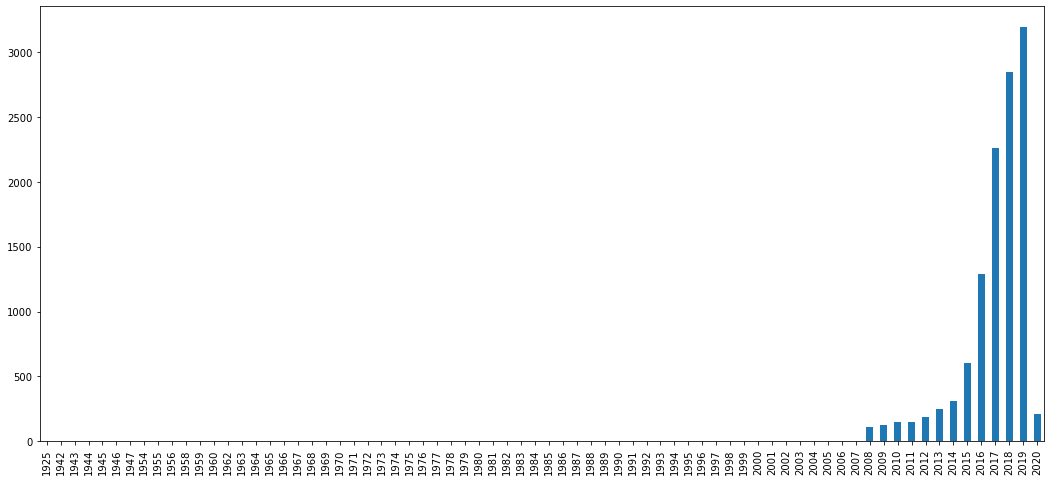

In [223]:
(df['release_year'].value_counts() + df['year_added'].value_counts()).plot(kind='bar', figsize=(18,8));

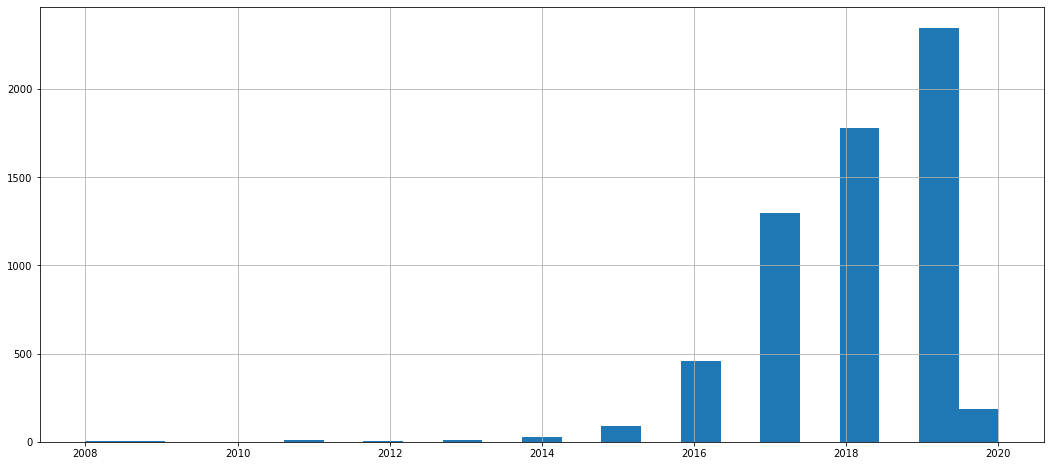

In [224]:
df['year_added'].hist(bins=23, figsize=(18,8));

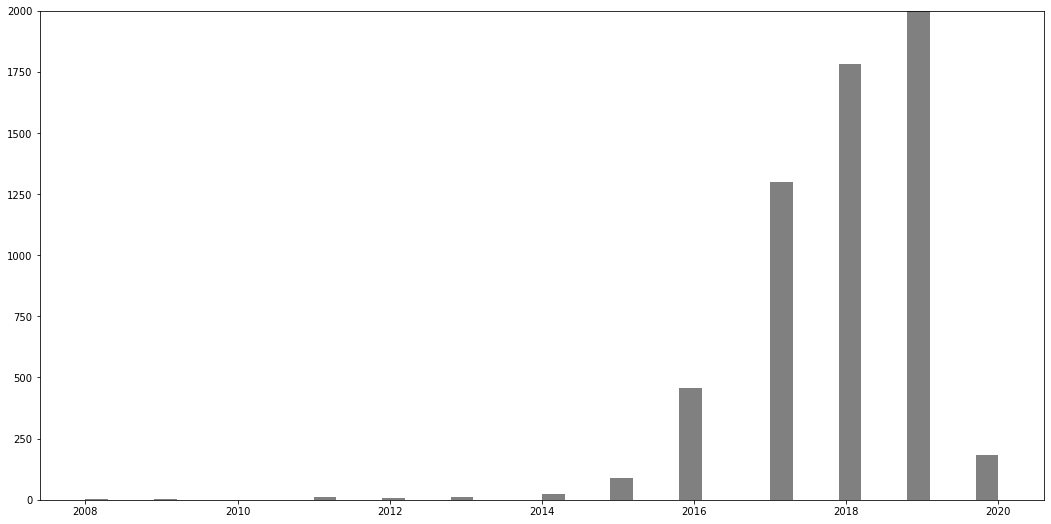

In [234]:
fig, ax = plt.subplots(figsize=(18, 9))
plt.hist(df['year_added'] , 40, facecolor='gray', align='mid')
plt.ylim(0, 2000);

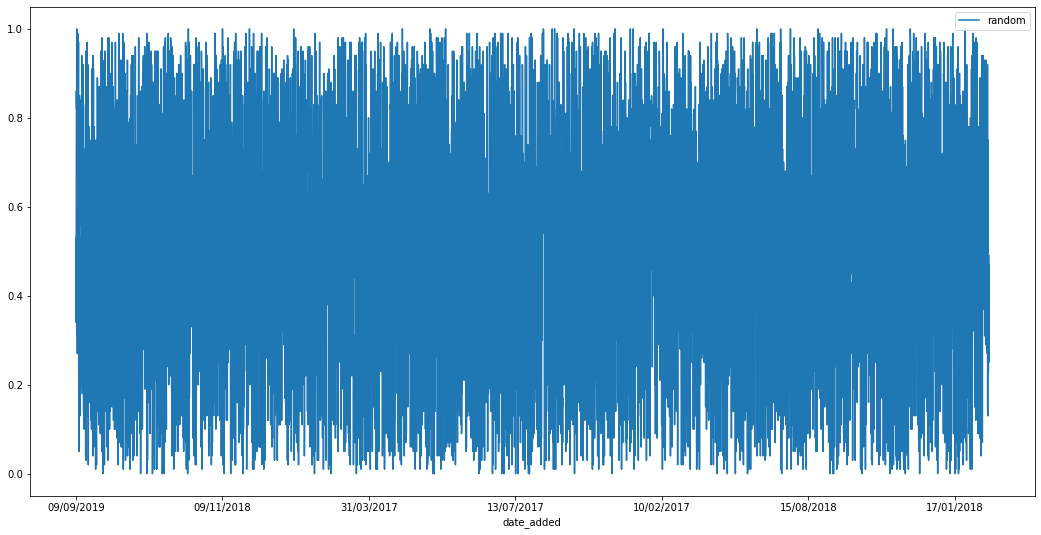

In [236]:
df.plot(x='date_added', y='random', figsize=(18,9))

In [238]:
df.sample()

show_id     type     title director  \
6162  80049903  TV Show  Dinotrux  Unknown   

                                                                                   cast  \
6162  Andrew Francis,Richard Ian Cox,Ashleigh Ball,Matt Hill,Brian Drummond,Paul Dobson   

            country  date_added  release_year  year_added month_added  \
6162  United States  18/08/2017  2017          2017.0      August       

      day_added    rating   duration listed_in  \
6162  18.0       TV-Y7-FV  5 Seasons  Kids' TV   

                                                                                                                                               description  \
6162  Half dinosaur, half construction truck, full-on fun! Watch giant Ty Rux, his little buddy Revvit and the crew come face-to-face with evil D-Structs.   

      random  uptodate  
6162  0.66    0.0

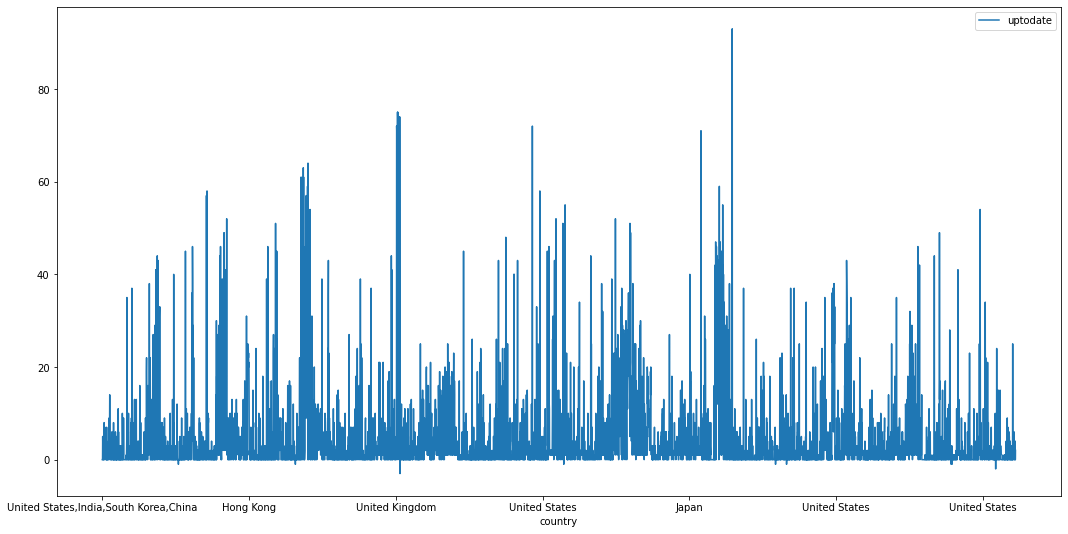

In [239]:
df.plot(x='country', y='uptodate', figsize=(18,9))